In [152]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
df = pd.read_csv("./dataset.csv")
print(df.head)
print(df.columns)

<bound method NDFrame.head of        Prov Con_ACT  Sex    Age   Measure   M0   M1   M2   M3   M4  ...  M30  \
0       NaN     NaN  NaN    NaN       NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
1        AB     ALL  ALL  18-19        Tx  2.0  2.0  2.0  2.0  2.0  ...  NaN   
2        AB     ALL  ALL  18-19    events  NaN  NaN  NaN  NaN  NaN  ...  NaN   
3        AB     ALL  ALL  18-19  censored  NaN  NaN  NaN  NaN  NaN  ...  NaN   
4        AB     ALL  ALL  25-29        Tx  3.0  3.0  3.0  3.0  2.0  ...  0.0   
...     ...     ...  ...    ...       ...  ...  ...  ...  ...  ...  ...  ...   
2375  UNKWN     Yes    F  50-54    events  NaN  NaN  NaN  NaN  NaN  ...  NaN   
2376  UNKWN     Yes    F  50-54  censored  NaN  NaN  NaN  1.0  1.0  ...  NaN   
2377  UNKWN     Yes    F    ALL        Tx  2.0  2.0  2.0  1.0  0.0  ...  NaN   
2378  UNKWN     Yes    F    ALL    events  NaN  NaN  NaN  NaN  NaN  ...  NaN   
2379  UNKWN     Yes    F    ALL  censored  NaN  NaN  NaN  1.0  1.0  ...  NaN   

      M31

## finding unique values in first 5 columns

In [13]:
print(df.Prov.unique()) #[nan 'AB' 'ALL' 'Atlantic' 'BC' 'ON' 'Prairies' 'QC' 'UNKWN']
print(df.Con_ACT.unique()) #[nan 'ALL' 'No' 'Null' 'Yes']
print(df.Sex.unique()) #[nan 'ALL' 'F' 'M']
print(df.Age.unique()) #[nan '18-19' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64' '65+' 'ALL' '20-24']
print(df.Measure.unique()) #[nan 'Tx' 'events' 'censored']

[nan 'AB' 'ALL' 'Atlantic' 'BC' 'ON' 'Prairies' 'QC' 'UNKWN']
[nan 'ALL' 'No' 'Null' 'Yes']
[nan 'ALL' 'F' 'M']
[nan '18-19' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59'
 '60-64' '65+' 'ALL' '20-24']
[nan 'Tx' 'events' 'censored']


### removing nan in first five columns

In [16]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()


Prov          1
Con_ACT       1
Sex           1
Age           1
Measure       1
M0         1587
M1          952
M2         1188
M3         1154
M4         1092
M5         1227
M6         1290
M7         1281
M8         1300
M9         1265
M10        1305
M11        1373
M12        1408
M13        1471
M14        1474
M15        1585
M16        1610
M17        1619
M18        1615
M19        1606
M20        1676
M21        1710
M22        1694
M23        1719
M24        1761
M25        1794
M26        1827
M27        1842
M28        1837
M29        1864
M30        1968
M31        2010
M32        2045
M33        2046
M34        2089
M35        2061
M36        2099
M37        2137
M38        2128
M39        2226
dtype: int64

In [18]:
print(df[df['Age'].isnull()][null_columns])
df = df[~df['Age'].isnull()] ## removed the other NaN instances in first 5 columns 

  Prov Con_ACT  Sex  Age Measure  M0  M1  M2  M3  M4  ...  M30  M31  M32  M33  \
0  NaN     NaN  NaN  NaN     NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   

   M34  M35  M36  M37  M38  M39  
0  NaN  NaN  NaN  NaN  NaN  NaN  

[1 rows x 45 columns]


### validating dataset to make sure "ALL" sums up to the other values in each column

In [121]:
for i in ("Age", "Prov", "Sex", "Con_ACT"):
    for j in ([("M" + str(i)) for i in range(0,40)]):
        table = pd.pivot_table(df, values=j, index=i, aggfunc='sum').reset_index()
        not_all_df = (table.loc[~table[i].isin(['ALL'])])
#         print(not_all_df[j].sum())
        all_df  = table.loc[table[i].isin(['ALL'])]
#         print(all_df[j].sum())
        if (not_all_df[j].sum()) - (all_df[j].sum()) != 0:
            print(False)

### remove anything that has ALL in it then start playing with the data


In [132]:
## look at "ALL" for first five columns (Prov, Age, Sex, Con_ACT)

In [131]:
df = pd.read_csv("./dataset.csv")
df = df[(df != 'ALL').all(axis=1)]
df.to_csv("dataset_without_ALL_values.csv")

df = pd.read_csv("./dataset.csv")
df = df[(df == 'ALL').any(axis=1)]
df.to_csv("dataset_with_ALL_values.csv")

# 1. How many patients stay on treatment for at least 9 months? 
### Answer: In total, 704 patients reach month 9 of treatment

In [164]:
df = pd.read_csv("./dataset.csv")
df = df[(df == 'ALL').any(axis=1)]

df.loc[(df['Prov']=="ALL") & (df['Con_ACT']=="ALL") & (df['Sex']=="ALL") & (df['Age']=="ALL") & (df['Measure']=="Tx"),['M9']]

##total: 704


,M9
343,704.0


## analyzing what makes up the 704 patients:

      Age     M9
0   18-19    3.0
1   20-24    6.0
2   25-29    9.0
3   30-34   20.0
4   35-39   47.0
5   40-44   68.0
6   45-49   90.0
7   50-54  125.0
8   55-59  152.0
9   60-64  106.0
10    65+   78.0


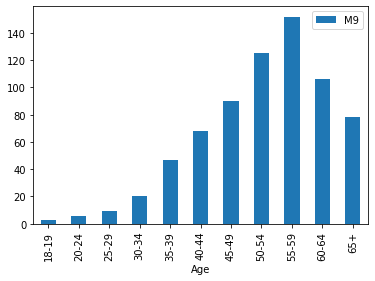

In [166]:
df = pd.read_csv("./dataset.csv")
df = df[(df != 'ALL').all(axis=1)]
df = df[df['Measure'] == "Tx"]
age_table = pd.pivot_table(df, values='M9', index="Age", aggfunc='sum').reset_index()
print(age_table)
fig, ax = plt.subplots()
age_table.plot.bar(x='Age', ax=ax) ##peak age group is 55-59 years old
fig.savefig('./plots/Q1/9months_by_age.png')


  Sex     M9
0   F  376.0
1   M  328.0


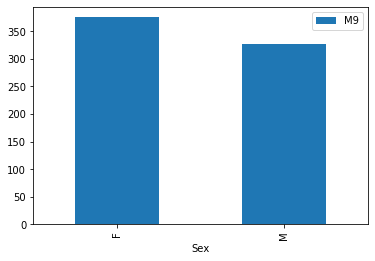

In [167]:
sex_table = pd.pivot_table(df, values='M9', index="Sex", aggfunc='sum').reset_index()
print(sex_table)
fig, ax = plt.subplots()
sex_table.plot.bar(x='Sex', ax=ax) ##376 female vs 328 male
fig.savefig('./plots/Q1/9months_by_sex.png')


       Prov     M9
0        AB   72.0
1  Atlantic   40.0
2        BC   67.0
3        ON  340.0
4  Prairies   16.0
5        QC  168.0
6     UNKWN    1.0


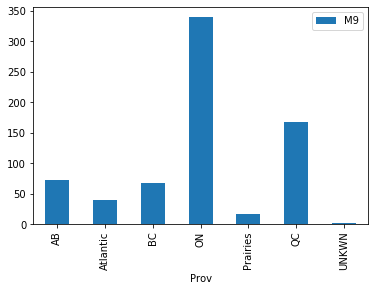

In [168]:
prov_table = pd.pivot_table(df, values='M9', index="Prov", aggfunc='sum').reset_index()
print(prov_table)
fig, ax = plt.subplots()
prov_table.plot.bar(x='Prov', ax=ax) 
fig.savefig('./plots/Q1/9months_by_prov.png') ## peak at ontario


  Con_ACT     M9
0      No  517.0
1    Null   82.0
2     Yes  105.0


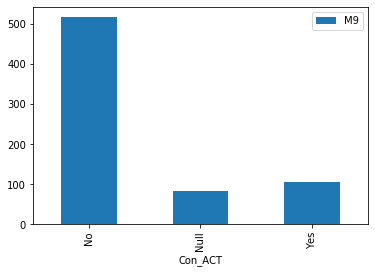

In [169]:
Con_ACT_table = pd.pivot_table(df, values='M9', index="Con_ACT", aggfunc='sum').reset_index()
print(Con_ACT_table)
fig, ax = plt.subplots()
Con_ACT_table.plot.bar(x='Con_ACT', ax=ax) 
fig.savefig('./plots/Q1/9months_by_con_ACT.png') ##peak no, does not use another anti-cancer therapy concurrently

# Summary of results for Q1:
- 704 patients receive treatment for at least 9 months. 
- The most common age group to receive at least 9 months of treatment is 55-59
- no significant difference between male and female
- most common in ontario, and for people that did not use another anti-cancer therapy concurrently


Note: If you check each of the above outputs in the past 4 cells, the total adds up to 704 (which is what we got for "ALL")